
Loading MNIST Data...

Preparing Classifier Training and Validation Data...

KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10

Pickling the Classifier for Future Use...

Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

KNN Trained Classifier Confidence:  0.9762857142857143

Accuracy of Classifier on Validation Image Data:  0.9762857142857143

Confusion Matrix: 
 [[645   0   0   0   1   1   1   0   0   1]
 [  0 809   2   0   0   1   0   0   0   0]
 [  4   8 694   2   0   0   1   3   2   0]
 [  1   3   7 699   0   3   1   4   4   1]
 [  0   4   1   0 672   0   2   1   1  12]
 [  2   1   0   5   0 615   2   2   1   3]
 [  4   0   0   0   1   0 650   0   0   0]
 [  0   7   0   0   3   1   0 715   0   8]
 [  0   6   1   5   4  12   3   1 636   6]
 [  2   0   2   1   5   3   0   2   1 699]]


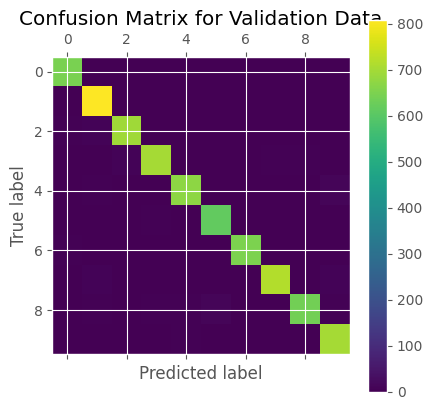


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Accuracy of Classifier on Test Images:  0.9762857142857143

Confusion Matrix for Test Data: 
 [[645   0   0   0   1   1   1   0   0   1]
 [  0 809   2   0   0   1   0   0   0   0]
 [  4   8 694   2   0   0   1   3   2   0]
 [  1   3   7 699   0   3   1   4   4   1]
 [  0   4   1   0 672   0   2   1   1  12]
 [  2   1   0   5   0 615   2   2   1   3]
 [  4   0   0   0   1   0 650   0   0   0]
 [  0   7   0   0   3   1   0 715   0   8]
 [  0   6   1   5   4  12   3   1 636   6]
 [  2   0   2   1   5   3   0   2   1 699]]


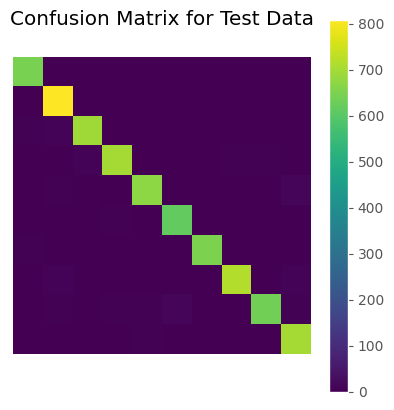

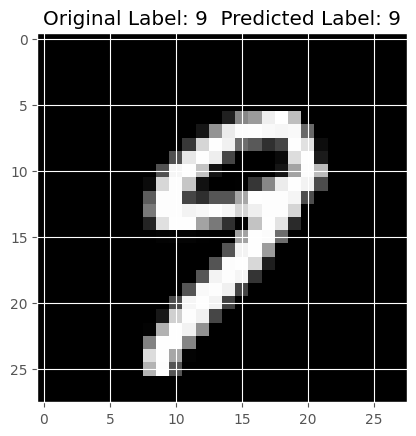

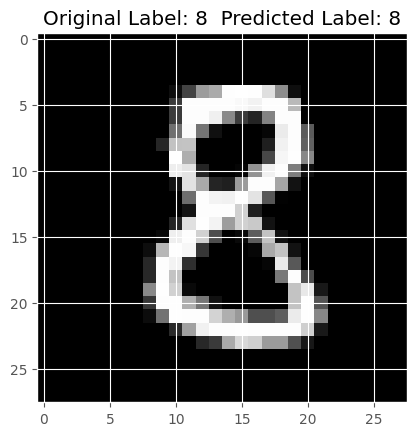

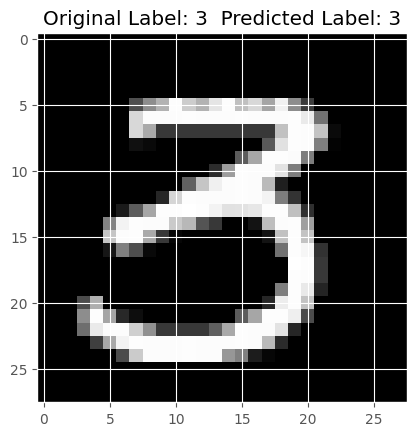

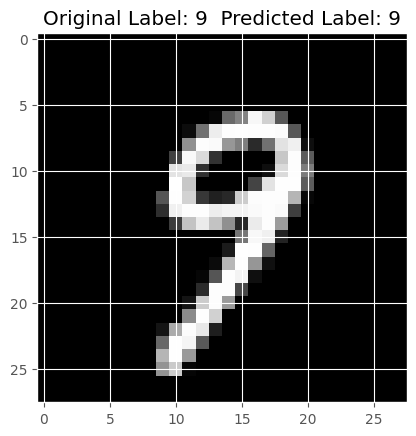

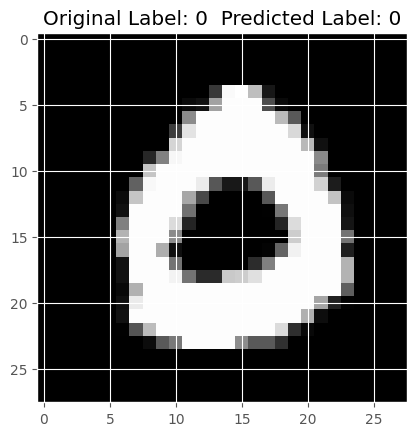

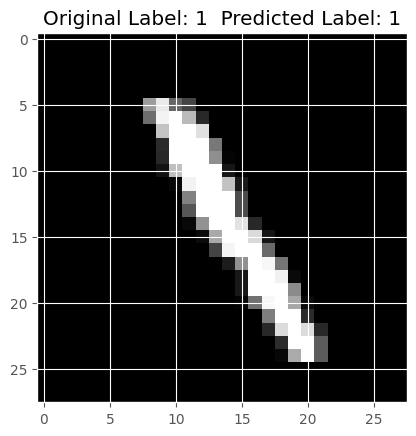

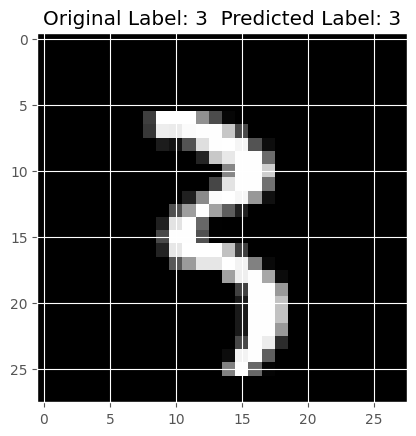

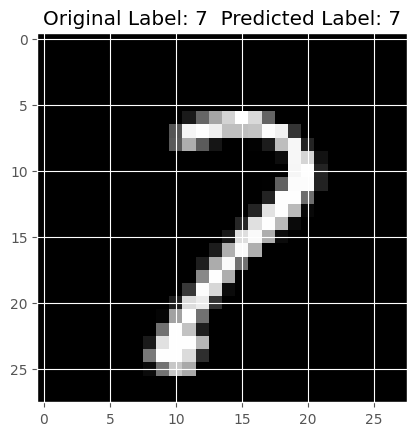

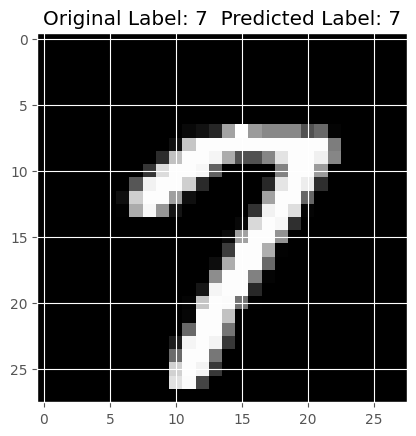

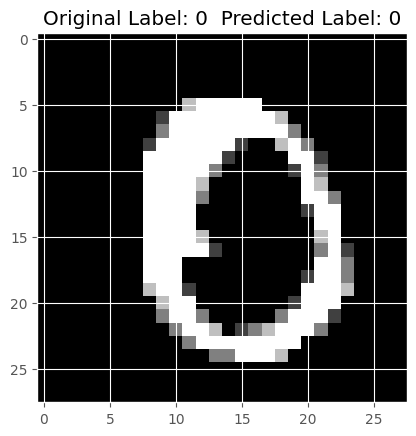

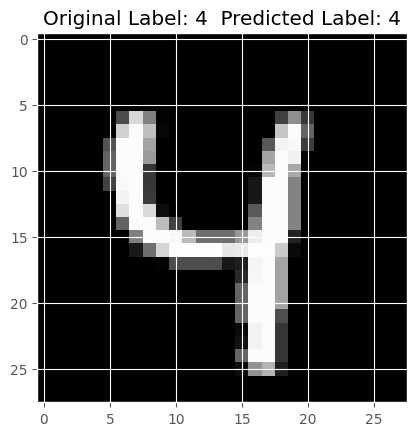

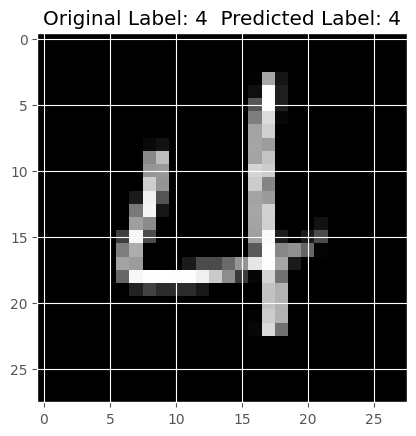

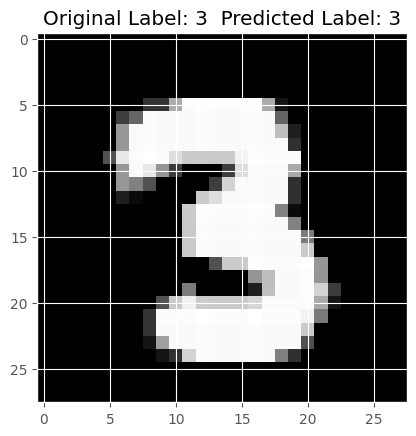

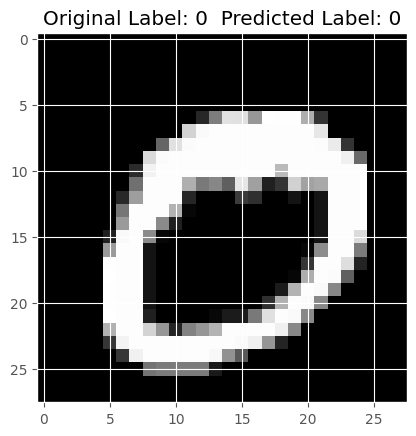

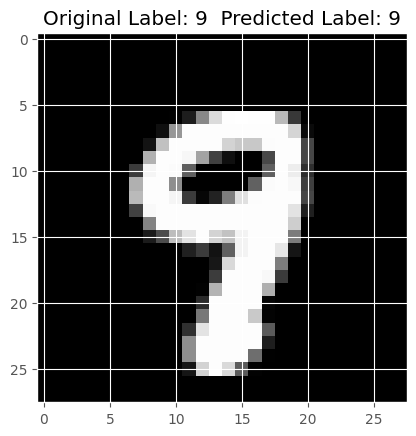

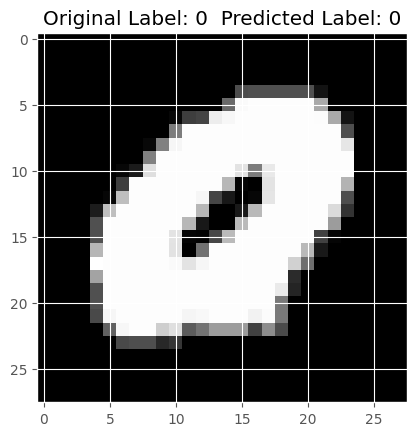

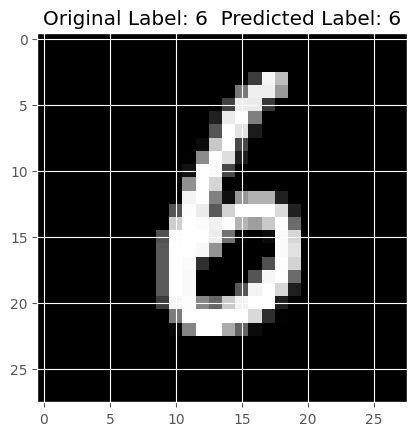

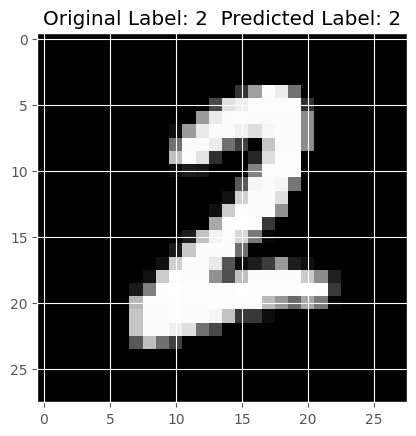

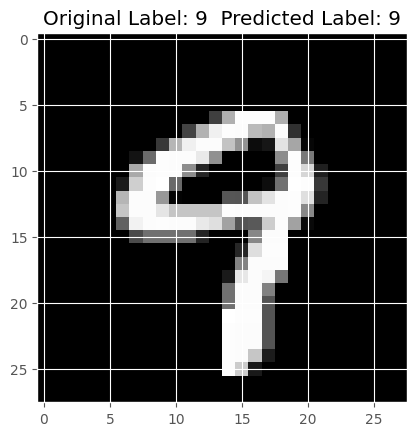

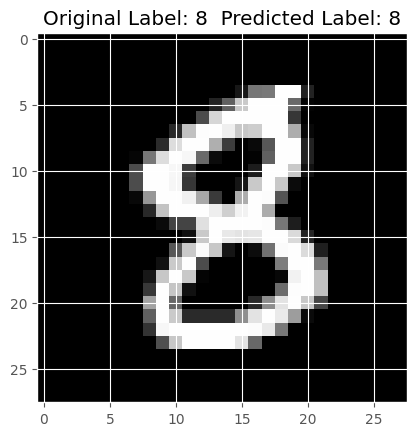

In [1]:
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Load MNIST dataset from openml
print('\nLoading MNIST Data...')
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X = X / 255.0  # Scale the features

# Split the data into training and testing sets
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# Create and train KNN Classifier
print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
clf.fit(X_train, y_train)

# Save the trained model to a file
with open('MNIST_KNN.pickle', 'wb') as f:
    pickle.dump(clf, f)

# Load the trained model from the file
with open('MNIST_KNN.pickle', 'rb') as f:
    clf = pickle.load(f)

# Evaluate the model
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nKNN Trained Classifier Confidence: ', confidence)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Show the Test Images with Original and Predicted Labels
print('\nMaking Predictions on Test Input Images...')
X_test_img = X_test.values.reshape((-1, 28, 28))  # Convert to NumPy array and reshape images for plotting
test_labels_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(y_test, test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(y_test, test_labels_pred)

print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

# Show some random Test Images with Original and Predicted Labels
a = np.random.randint(0, len(X_test_img), 20)
for i in a:
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test.iloc[i], test_labels_pred[i]))
    plt.imshow(X_test_img[i], cmap='gray')
    plt.show()